---



# **GESTIÓN Y ALMACENAMIENTO DE DATOS**

## Avance proyecto final

##### Carlos Alberto Ruiz Delgado - 2241005



---



### Descripción del Proyecto:
##### En este proyecto, se llevará a cabo un proceso completo de limpieza, imputación y visualización de datos utilizando Python y herramientas como Pandas, NumPy y Matplotlib. Se abordarán los siguientes aspectos durante la sustentación:

### Contexto de los Datos:
##### Se proporcionará una breve introducción al conjunto de datos utilizado, explicando su origen y relevancia en el contexto del problema a resolver.

* **Introducción:**

El dataset empleado se llama "Forest Fires", proviene de un estudio entre investigadores asociados a la IEEE, el cual consta de información meteorológica y del tiempo, recolectada en incendios presentados bosques y selvas brasileñas y portugesas. Se recolectó dicha información con la intención de lograr obtener información valiosa, correlaciones entre las variables meteorológicas y el área potencial quemada por el incendio.

Los incendios se producen cuando la ignición (ya sea proveniente de un rayo, hoguera descuidada o el reflejo del sol en el vidrio, por ejemplo) se une al combustible disponible (vegetación seca), provocando las brasas o llamas que el aire se encarga de avivar y expandir.

* **Problemática:**

Debido al cambio climático y demás factores (medioambientales, auto-provocados, etc), hemos presenciado en nuestra región una creciente ola de incendios forestales; acabando con la vida de gran parte de nuestra fauna, flora y biodiversidad en general. No obstante, en la mayoría de las ocasiones se presenta más de un incendio al tiempo y al tener un personal de apoyo limitado, no se pueden cubrir de manera eficiente estos desastres.

En este sentido, se ha decidio seleccionar un dataset de incendios de forestales, con la intención de generar un modelo que sea capaz de estimar (de acuerdo con ciertas variables meteorológicas), el área potencial a quemarse o perderse debido a dichos fenómenos.

* **Valor generado:**

Una vez estimando el área potencial a ser quemada, se podría disponibilizar la información a los organismos de socorro, bomberos y/o atención de incendios, como una herramienta que les permita priorizar la atención de los fenómenos de la región, optimizando el número de personas que componen cada equipo de apoyo acorde al área potencial a ser quemada y así poder atender de mejor manera dichos fenómenos.

* **Referencias:**

[1] Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.

[2] Cortez, P. and Aníbal de Jesus Raimundo Morais. “A data mining approach to predict forest fires using meteorological data.” (2007).

[3] Tables for the Canadian Forest Fire Weather Index System, Canadian Forestry Service, Forest Technical Report, 1984.



### **Composición de la Base de Datos:**
##### Se detallará la estructura y composición de la base de datos, incluyendo la cantidad de registros, las variables disponibles y su significado.

El conjunto de datos consiste en 12 variables predictoras y un target (continuo).

1. **X** - coordenada espacial del eje x dentro del mapa del lugar: (1 a 9)
2. **Y** - coordenada espacial del eje y dentro del mapa del lugar: (2 a 9)
3. **mes** - mes del año:  ('ene' a 'dic')
4. **día** - día de la semana: ('jan' a 'sun')
5. **FFMC** - índice FFMC del sistema FWI, código de Humedad de Combustible Fino: (18,7 a 96,20)
6. **DMC** - índice DMC del sistema FWI, código de Humedad Duff: (1,1 a 291,3)
7. **DC** - Índice DC del sistema FWI: (7,9 a 860,6)
8. **ISI** - Índice ISI del sistema FWI, código de Sequía: (0,0 a 56,10)
9. **temp** - temperatura en grados Celsius: (2° a 33,3°)
10. **RH** - humedad relativa en %: (15 a 100%)
11. **wind** - velocidad del viento en km/h: (0,4 a 9,4)
12. **lluvia** - lluvia exterior en mm/m^2 : (0,0 a 6,4)
13. **superficie [Target]** - superficie quemada del bosque (en hectáreas): (0.00 a 1090.84)

Fire Weather Index (FWI) System

https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/CarlosRuiz0/DATA/main/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [70]:
print(f'El dataset posee {df.shape[0]} filas y {df.shape[1]} columnas, incluido el target.')

El dataset posee 517 filas y 13 columnas, incluido el target.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [72]:
# Observamos los duplicados
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [73]:
df.drop_duplicates(inplace=True)
df.shape

(513, 13)

In [74]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,513.0,4.678363,2.320059,1.0,3.0,4.00,7.00,9.00
Y,513.0,4.300195,1.230925,2.0,4.0,4.00,5.00,9.00
FFMC,513.0,90.637427,5.540920,18.7,90.2,91.60,92.90,96.20
DMC,513.0,110.989279,64.191013,1.1,68.6,108.30,142.40,291.30
DC,513.0,549.155166,247.724594,7.9,440.9,664.50,713.90,860.60
ISI,513.0,9.023587,4.575543,0.0,6.4,8.40,11.00,56.10
temp,513.0,18.887524,5.828128,2.2,15.5,19.30,22.80,33.30
RH,513.0,44.348928,16.358803,15.0,33.0,42.00,53.00,100.00
wind,513.0,4.010526,1.796613,0.4,2.7,4.00,4.90,9.40
rain,513.0,0.021832,0.297107,0.0,0.0,0.00,0.00,6.40


### Proceso de Limpieza e Imputación:
##### Se describirán los pasos realizados durante el proceso de limpieza de datos, que pueden incluir la eliminación de valores atípicos, la corrección de errores y la estandarización de formatos. En caso de ser necesario, se explicará el proceso de imputación de datos faltantes y las estrategias utilizadas para ello.



In [76]:
# Revisamos los valores únicos y verificamos que no hayan errores (o duplicidades por case sensitve si aplica)
df['X'].unique()

array([7, 8, 6, 5, 4, 2, 9, 1, 3])

In [77]:
# Revisamos frecuencias
df['X'].value_counts()

4    89
6    86
2    73
8    61
7    60
3    53
1    48
5    30
9    13
Name: X, dtype: int64

In [78]:
# Revisamos los valores únicos y verificamos que no hayan errores (o duplicidades por case sensitve si aplica)
df['Y'].unique()

array([5, 4, 6, 3, 2, 9, 8])

In [79]:
# Revisamos frecuencias
df['Y'].value_counts()

4    201
5    125
6     73
3     63
2     44
9      6
8      1
Name: Y, dtype: int64

In [80]:
# Revisamos los valores únicos y verificamos que no hayan errores (o duplicidades por case sensitve si aplica)
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [81]:
# Revisamos frecuencias
df['month'].value_counts()

aug    182
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [82]:
# Creamos el dic como alternativa a un ordinal enconder
diccionario_meses = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7,
                     'aug':8, 'sep':9,  'oct':10,  'nov':11, 'dec':12}

In [83]:
# Reemplazo y veo los valores únicos por si no se hizo algún reemplazo
df['month'] = df['month'].replace(diccionario_meses)
df['month'].unique()

array([ 3, 10,  8,  9,  4,  6,  7,  2,  1, 12,  5, 11])

In [84]:
# Revisamos los valores únicos y verificamos que no hayan errores (o duplicidades por case sensitve si aplica)
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [85]:
diccionario_dias = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}

In [86]:
df['day'].value_counts()

sun    94
fri    84
sat    83
mon    74
tue    64
thu    61
wed    53
Name: day, dtype: int64

In [87]:
# Reemplazamos y revisamos
df['day'] = df['day'].replace(diccionario_dias)
df['day'].unique()

array([5, 2, 6, 7, 1, 3, 4])

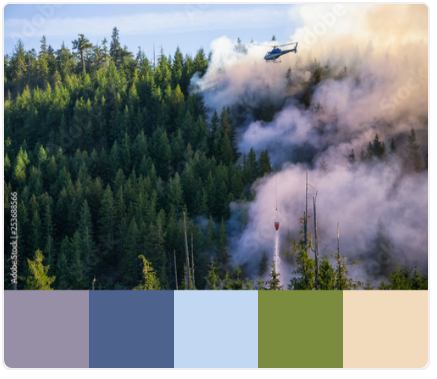

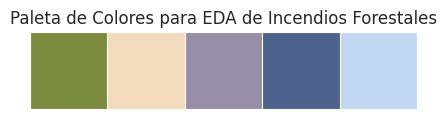

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores personalizada
forest_fire_palette = ["#7C8C3F", "#F2DABD","#968FA6", "#4D628C", "#C2D7F2"]

cmap = sns.color_palette(forest_fire_palette, as_cmap=True)
# Establecer la paleta de colores en seaborn
sns.set_palette(sns.color_palette(forest_fire_palette))
sns.palplot(sns.color_palette(forest_fire_palette))
plt.title("Paleta de Colores para EDA de Incendios Forestales")
plt.show()

In [89]:
# Esta variable es continua, pero al ser parte de un protocolo de incendios tiene un valor rango establecido
# El parámetro varía entre 0 y 101
df['FFMC'].min(), df['FFMC'].max()

(18.7, 96.2)

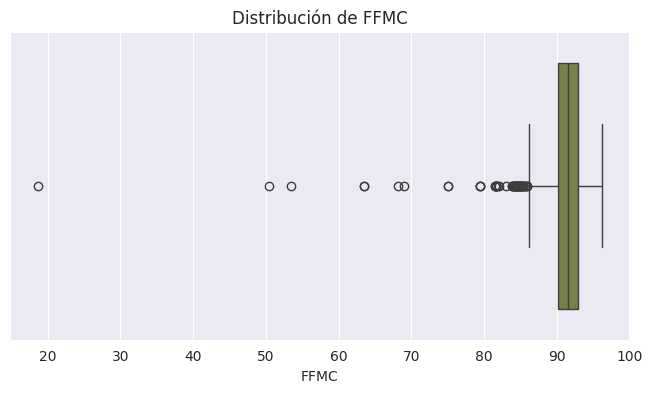

In [90]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['FFMC'])
plt.title("Distribución de FFMC" )
plt.show()

In [91]:
# No reemplazamos outliers que aparecen porque están dentro de los valores esperados
# Sin embargo, si llega a existir un valor por fuera del rango será reemplazado/imputado.
condicion_FFMC = (df['FFMC'] > 101)|(df['FFMC'] < 0)
df.loc[condicion_FFMC, 'FFMC'] = round(df.FFMC.mean(),1)

In [92]:
# Variable continua, sin unidad y de extremo abierto.
# Rango: 0 en adelante.
df['DMC'].min(), df['DMC'].max()

(1.1, 291.3)

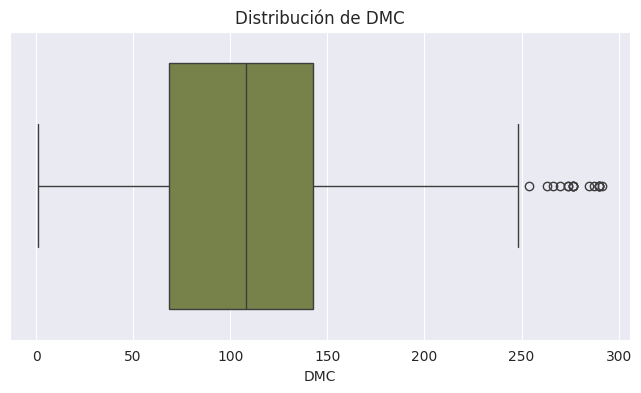

In [93]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['DMC'])
plt.title("Distribución de DMC" )
plt.show()

In [94]:
# No reemplazamos outliers que aparecen porque están dentro de los valores esperados
# Sin embargo, si llega a existir un valor por fuera del rango será reemplazado/imputado.
condicion_DMC = (df['DMC'] < 0)
df.loc[condicion_DMC, 'DMC'] = round(df.DMC.mean(),1)

In [95]:
# Rango establecido entre 0-1000
df['DC'].min(), df['DC'].max()

(7.9, 860.6)

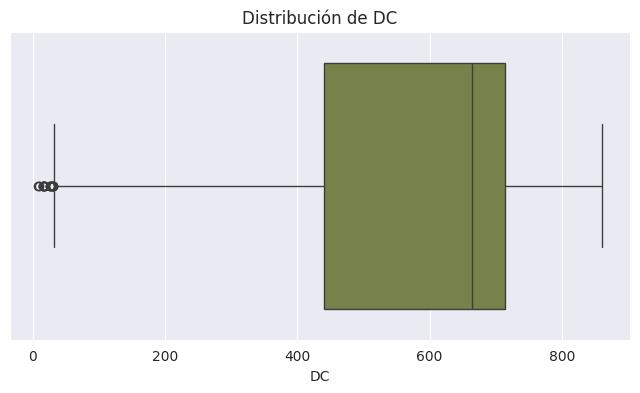

In [96]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['DC'])
plt.title("Distribución de DC" )
plt.show()

In [97]:
# No reemplazamos outliers que aparecen porque están dentro de los valores esperados
# Sin embargo, si llega a existir un valor por fuera del rango será reemplazado/imputado.
condicion_DC = (df['DC'] > 1000)|(df['DC'] < 0)
df.loc[condicion_DC, 'DC'] = round(df.DC.mean(),1)

In [98]:
# Rango de 0 en adelante.
df['ISI'].min(), df['ISI'].max()

(0.0, 56.1)

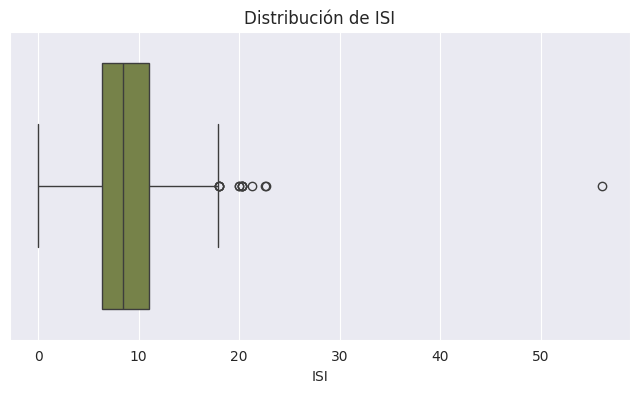

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['ISI'])
plt.title("Distribución de ISI" )
plt.show()

In [100]:
# No reemplazamos outliers que aparecen porque están dentro de los valores esperados
# Sin embargo, si llega a existir un valor por fuera del rango será reemplazado/imputado.
condicion_ISI = (df['ISI'] < 0)
df.loc[condicion_ISI, 'ISI'] = round(df.ISI.mean(),1)

In [101]:
df['temp'].min(), df['temp'].max()

(2.2, 33.3)

In [102]:
df.loc[(df['temp'] > 57), 'DC'] = round(df.temp.mean(),1)

In [103]:
# Porcentaje de humedad entre 0 y 100%
df['RH'].min(), df['RH'].max()

(15, 100)

In [104]:
# Si llega a existir un valor por fuera del rango será reemplazado/imputado.
condicion_RH = (df['RH'] < 0)|(df['RH'] > 100)
df.loc[condicion_RH, 'RH'] = int(round(df.RH.mean(),0))

In [105]:
# Velocidad del viento km/h
df['wind'].min(), df['wind'].max()

(0.4, 9.4)

In [106]:
# Reemplazamos/imputamos valores negativos
condicion_wind = (df['wind'] < 0)
df.loc[condicion_wind, 'wind'] = round(df.wind.mean(),1)

In [107]:
# Lluvia mm/m^2
df['rain'].min(), df['rain'].max()

(0.0, 6.4)

In [108]:
# Reemplazamos/imputamos valores negativos
condicion_rain = (df['rain'] < 0)
df.loc[condicion_rain, 'rain'] = round(df.rain.mean(), 1)

In [109]:
df['area'].describe()

count     513.000000
mean       12.891598
std        63.892586
min         0.000000
25%         0.000000
50%         0.540000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

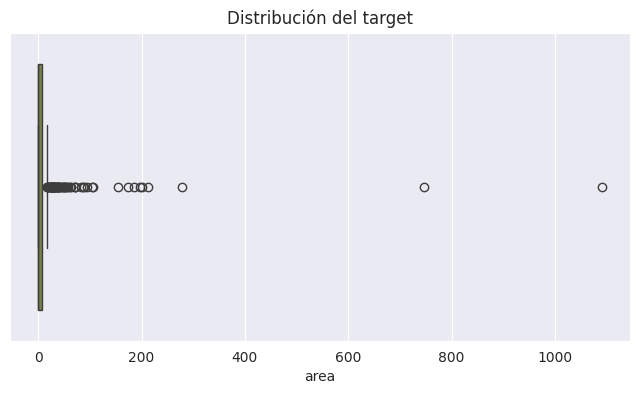

In [110]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['area'])
plt.title("Distribución del target" )
plt.show()

In [111]:
df[df['area']>150]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
234,4,5,9,6,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,8,7,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,9,6,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,9,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,9,6,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,8,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
415,8,6,8,4,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,8,3,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76
479,7,4,7,1,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [112]:
df.area[df['area']>150].mean(), df.area[df['area']>150].median()

(360.13555555555547, 200.94)

In [113]:
# Los valores por encima de 400, tienen unos valores muy similares a los mayores a 150, por ende, se imputan
condicion_area = (df['area']>400)
df.loc[condicion_area, 'area'] = round(df.area[df['area']>150].median(),1)

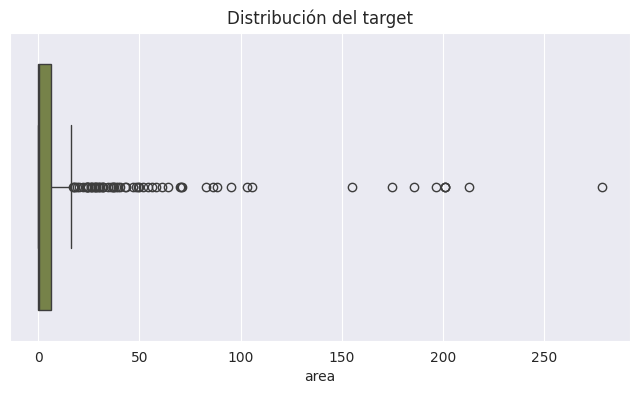

In [114]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['area'])
plt.title("Distribución del target" )
plt.show()

In [115]:
# Transformamos las variables condificadas en categóricas
df['month'], df['day'] = df['month'].astype('category'), df['day'].astype('category')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       513 non-null    int64   
 1   Y       513 non-null    int64   
 2   month   513 non-null    category
 3   day     513 non-null    category
 4   FFMC    513 non-null    float64 
 5   DMC     513 non-null    float64 
 6   DC      513 non-null    float64 
 7   ISI     513 non-null    float64 
 8   temp    513 non-null    float64 
 9   RH      513 non-null    int64   
 10  wind    513 non-null    float64 
 11  rain    513 non-null    float64 
 12  area    513 non-null    float64 
dtypes: category(2), float64(8), int64(3)
memory usage: 49.8 KB


In [117]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Visualización de Datos:
##### Se presentarán al menos tres gráficos que representen aspectos relevantes de los datos analizados. Cada gráfico será acompañado de una explicación detallada que resalte los insights obtenidos a partir de la visualización.

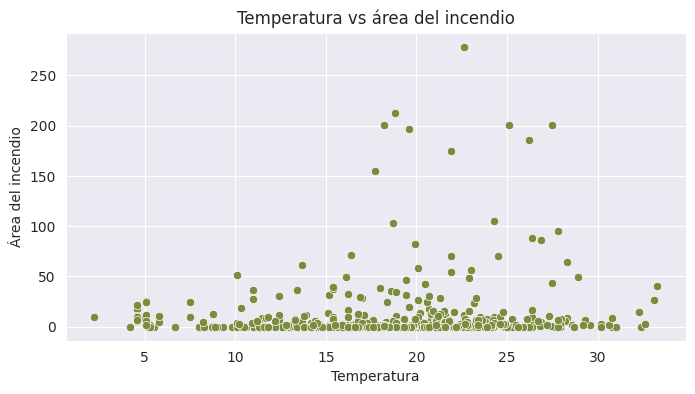

In [118]:
plt.figure(figsize=(8, 4))
plt.title("Temperatura vs área del incendio" )
sns.scatterplot(x = df['temp'], y = df['area'])
plt.xlabel("Temperatura")
plt.ylabel("Área del incendio")
plt.show()

* No se observa una relación entre la temperatura y el área del incendio.
* Podría haber un leve indicio de relación directa, pero es muy débil

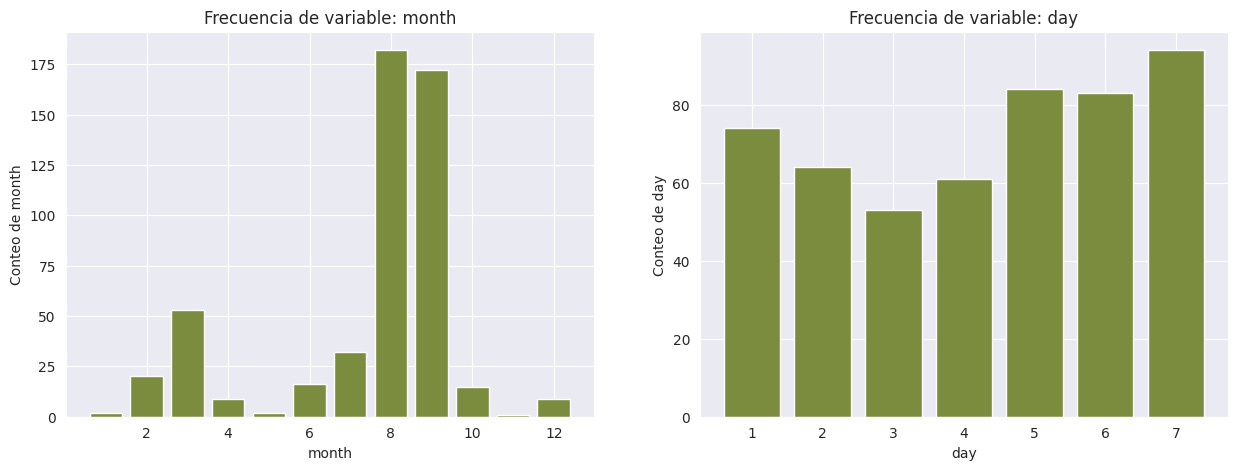

In [119]:
categorical_feature = ['month', 'day']

plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = df.copy()
    unique = df[column].value_counts(ascending=True);

    plt.subplot(1, 2, idx+1)
    plt.title("Frecuencia de variable: "+ column)
    plt.bar(unique.index, unique.values);

    plt.xlabel(column)
    plt.ylabel("Conteo de "+ column)

plt.show()

* En los meses Julio y Agosto se concentra la mayoría de registros de incendios. Y en noviembre, el mes con menor frecuencia de incendios.
* El día domingo hay mayor frecuencia de apariciones de incendios.

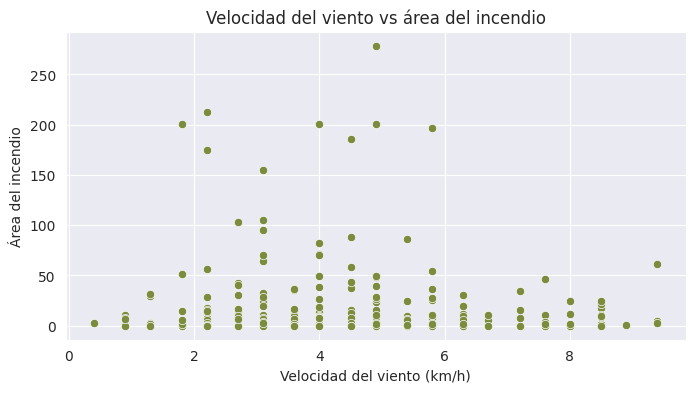

In [120]:
plt.figure(figsize=(8, 4))
plt.title("Velocidad del viento vs área del incendio" )
sns.scatterplot(x = df['wind'], y = df['area'])
plt.xlabel("Velocidad del viento (km/h)")
plt.ylabel("Área del incendio")
plt.show()

* Se esperaría haber obtenido una relación más directa y fuerte entre la velocidad del viento y el área del incendio, debido a que este es un factor muy importante en la expansión de las llamas.

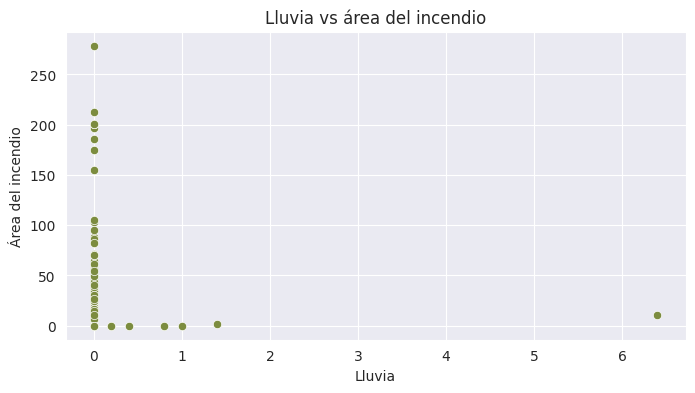

In [121]:
plt.figure(figsize=(8, 4))
plt.title("Lluvia vs área del incendio" )
sns.scatterplot(x = df['rain'], y = df['area'])
plt.xlabel("Lluvia")
plt.ylabel("Área del incendio")
plt.show()

* Cuando hay presencia de lluvia, el área del incendio prácticamente es cero o muy baja.

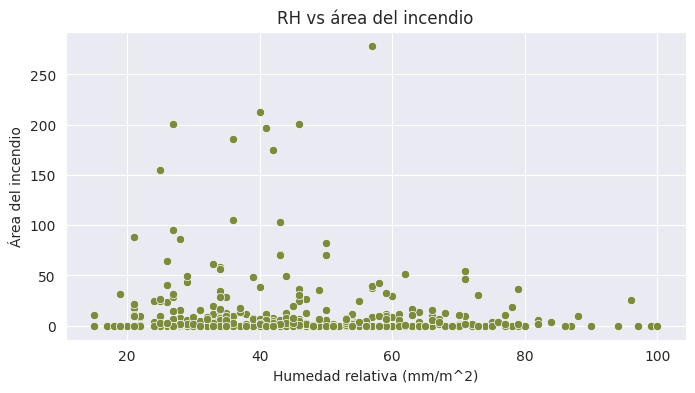

In [122]:
plt.figure(figsize=(8, 4))
plt.title("RH vs área del incendio" )
sns.scatterplot(x = df['RH'], y = df['area'])
plt.xlabel("Humedad relativa (mm/m^2)")
plt.ylabel("Área del incendio")
plt.show()

* A mayor humedad relativa en el ambiente (cantidad de vapor de agua presente en el aire), las llamas tienden a expandirse en menor medida (menor área del incendio)

<Figure size 800x400 with 0 Axes>

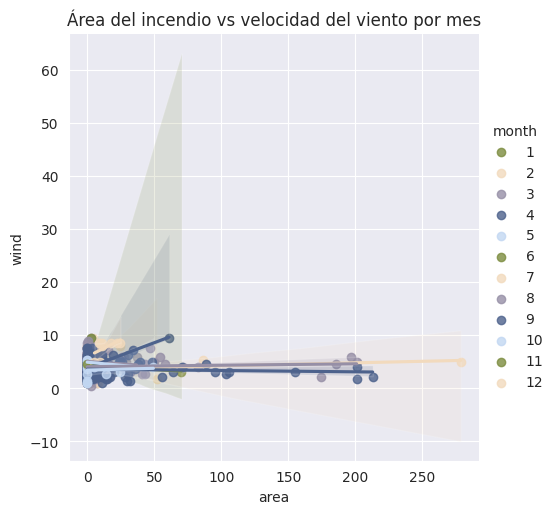

In [137]:
plt.figure(figsize=(8, 4))
sns.lmplot(data=df, y="wind", x="area", hue="month", height=5, palette=forest_fire_palette)
plt.title("Área del incendio vs velocidad del viento por mes" )
plt.show()

* Los valores más altos en cuanto a áreas del incendio, se alcanzan en los meses donde hay más viento Agosto y Septiembre (8 y 9).

<ipython-input-131-b503602ab953>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1,  cmap=cmap)


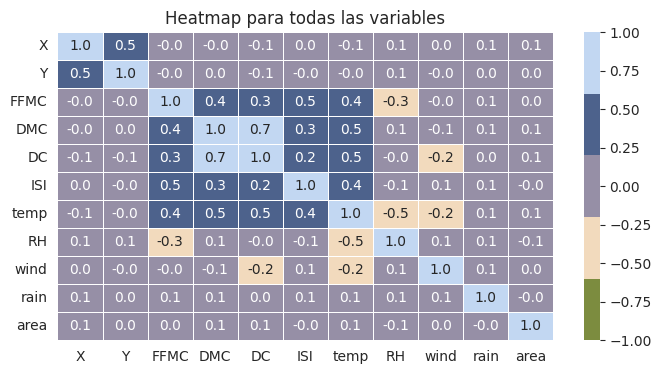

In [131]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1,  cmap=cmap)
plt.title("Heatmap para todas las variables")
plt.show()

<ipython-input-133-2f91ac7f701d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1, cmap=cmap)


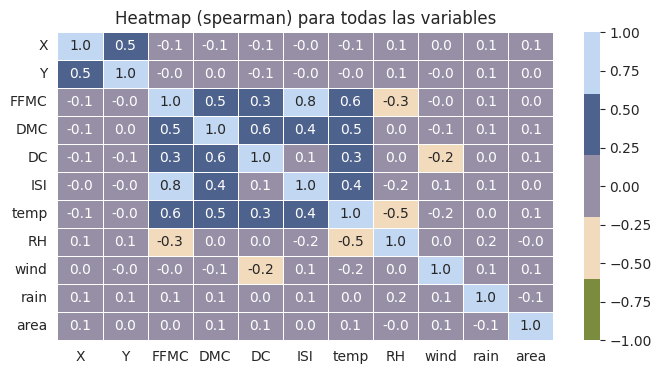

In [133]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt=".1f",  vmin=-1, vmax=1, cmap=cmap)
plt.title("Heatmap (spearman) para todas las variables")
plt.show()

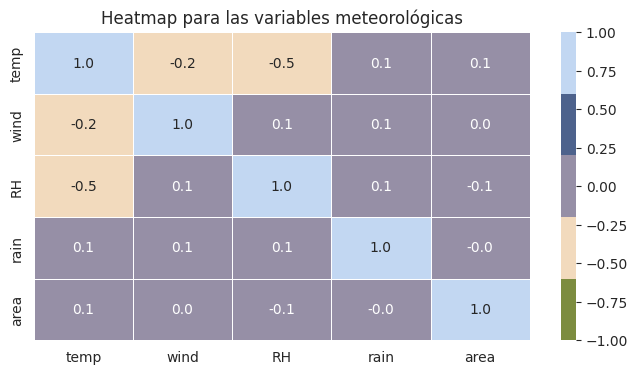

In [135]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["temp", "wind","RH", "rain", "area"]].corr(), annot=True, linewidths=.5, fmt=".1f", vmin=-1, vmax=1, cmap=cmap)
plt.title("Heatmap para las variables meteorológicas")
plt.show()

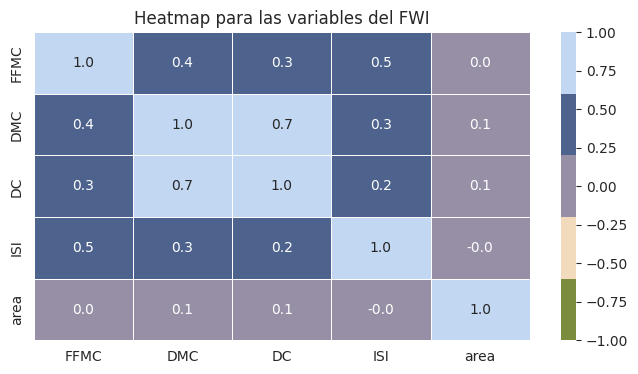

In [136]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["FFMC", "DMC", "DC", "ISI","area"]].corr(), annot=True, linewidths=.5, fmt=".1f", vmin=-1, vmax=1, cmap=cmap)
plt.title("Heatmap para las variables del FWI")
plt.show()

Correlaciones entre Índices del Sistema FWI (FFMC, DMC, DC, ISI):

- Los índices del sistema FWI, especialmente DMC y DC, tienden a mostrar una correlación positiva entre sí, lo que indica que están relacionados y posiblemente respondan a condiciones ambientales similares que afectan al combustible del bosque.

- El ISI muestra una correlación moderada con FFMC, lo que puede reflejar cómo la humedad del combustible y la sequía influyen en el potencial de fuego.

Correlaciones con la Temperatura (temp):

- La temperatura muestra una correlación moderada con varios índices del FWI (especialmente con FFMC y ISI), lo cual es lógico ya que condiciones más cálidas pueden aumentar la sequedad y la inflamabilidad del material combustible.

Correlaciones con la Humedad Relativa (RH):

- La humedad relativa tiene una correlación negativa con la temperatura y los índices del FWI, lo que tiene sentido ya que una mayor humedad generalmente reduce el riesgo de incendio.

Correlaciones con la Velocidad del Viento (wind):

- La velocidad del viento no muestra correlaciones fuertes con las otras variables, pero puede jugar un papel en la propagación del fuego una vez iniciado.

Correlaciones con la Precipitación (rain):

- La precipitación tiene correlaciones muy bajas con otras variables, lo que podría indicar que los eventos de lluvia son menos frecuentes o menos relevantes para los otros factores que se están midiendo.

Correlaciones con el Área Quemada (area – Target):

- El bajo nivel de correlación directa entre el área quemada y las variables individuales sugiere que la predicción del área quemada puede requerir modelos que puedan capturar interacciones no lineales y efectos combinados de múltiples factores.

In [139]:
df.to_csv('data_clean_forest_fires.csv')